In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize
from sklearn.cluster import KMeans
import os

In [2]:
df = pd.read_csv('input_data/populartimes_20211201-132821.csv', dtype = str, encoding='utf-8', delimiter = ',')

In [3]:
df.drop_duplicates(subset='node_type', inplace=True)
df.reset_index(inplace=True)

In [4]:
df

,index,place_id,name,lat,lon,node_type,address,place,popular_times,rating,rating_n,current_popularity,time_spent
0,0,ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,47.4554815,19.040086499999997,bank,"Budapest, Fehérvári út 130","Erste Bank fiók Budapest, Fehérvári út 130 bud...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",2.4,39,60,"[15, 45]"
1,1,ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,47.3995473,19.0506207,car_repair,"Budapest, II. Rákóczi Ferenc utca 279","4P Car Kft. Budapest, II. Rákóczi Ferenc utca ...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.5,60,NaN,NaN
2,2,ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,47.5706476,19.064781699999997,restaurant,"Budapest, Római part 26","Nyárfás Kávéház Budapest, Római part 26 budapest","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.1,292,NaN,NaN
3,3,ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,47.5442588,19.1156514,liquor_store,"Budapest, Alkotmány utca 20","M3 Sztráda Italdiszkont Budapest, Alkotmány ut...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.5,191,NaN,"[10, 10]"
4,4,ChIJ--SenG3cQUcRIZQzjGGqyS0,"Magyar zászló, zászlórúd, zászlótartó bolt és ...",47.5067109,19.060857300000002,home_goods_store,"Budapest, Teréz körút 32","Magyar zászló, zászlórúd, zászlótartó bolt és ...",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,4688,ChIJdc250sjnQUcR0HMB_yMh5us,Palásti és Társa Kft.,47.405392,19.053094899999998,funeral_home,"Budapest, II. Rákóczi Ferenc utca 251","Palásti és Társa Kft. Budapest, II. Rákóczi Fe...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",5,10,NaN,NaN
84,4811,ChIJedirKsncQUcRitCtBZVXSoI,Elek Gyula Aréna,47.482452,19.1178478,stadium,X. kerület,Elek Gyula Aréna X. kerület budapest,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.6,510,32,"[90, 210]"
85,4927,ChIJfxOb41jcQUcRmDfNKyVh4w0,Taxidroszt,47.4889369,19.0707086,taxi_stand,"Budapest, József körút 52-56","Taxidroszt Budapest, József körút 52-56 budapest",None,None,None,None,None
86,6204,ChIJrdgFQ2jZQUcRj39j-pICIm8,Lili-N Tour Kft.,47.5443586,19.0359498,real_estate_agency,"Budapest, Vörösvári út 21","Lili-N Tour Kft. Budapest, Vörösvári út 21 bud...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",5,27,NaN,NaN


In [5]:
# one_month_df = []
# for csv_file in os.listdir('input_data'):
#     file_path = 'input_data/' + csv_file
#     df = pd.read_csv(file_path, dtype = str, encoding='utf-8', delimiter = ',')
#     one_month_df.append(df)

# df = pd.concat(one_month_df, axis=0)

In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
json_string = df['popular_times'][0]

In [8]:
json_string = df['popular_times'][0][1:-1].replace("'",'"')

In [9]:
json_obj = json.loads('[' + json_string + ']')

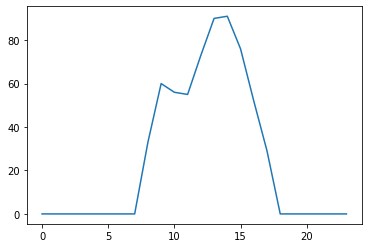

In [10]:
plt.plot(json_obj[0]['data'])
plt.show()

In [11]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday"]

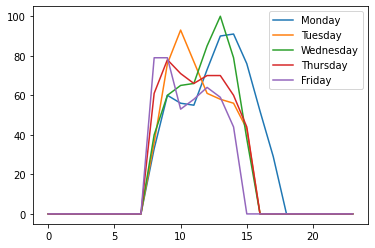

In [12]:
for day in range(5):
    plt.plot(json_obj[day]['data'], label=weekDays[day])
    plt.legend()
plt.show()

In [13]:
weekday_data = np.array([json_obj[day]['data'] for day in range(5)])

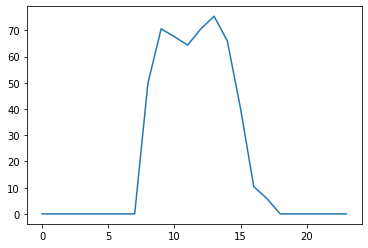

In [14]:
plt.plot(weekday_data.mean(axis = 0))
plt.show()

### Assumed that rates are normally distributed

In [15]:
l = 0
mu = weekday_data[l].mean()

In [16]:
std = weekday_data[l].std()

In [17]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

x = np.linspace(0, 24, 24)
popt, _ = optimize.curve_fit(gaussian, x, weekday_data[l])

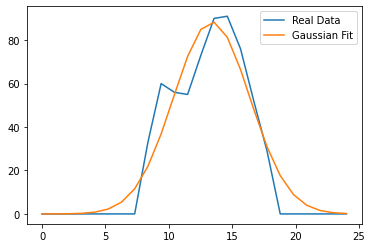

In [18]:
plt.plot(x, weekday_data[l], label='Real Data')
plt.plot(x, gaussian(x, *popt), label='Gaussian Fit')
plt.legend()
plt.show()

### Process one row at a time

In [19]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday"]

In [20]:
row_idx = 0
row = df['popular_times'][row_idx][1:-1].replace("'",'"')
json_row_obj = json.loads('['+row+']')

In [21]:
row_data = []  # mu1,std1,mu2,std2

In [22]:
day_of_week_idx = 0
day_of_week = np.array(json_row_obj[day_of_week_idx]['data'])

In [23]:
mu = day_of_week.mean()
std = day_of_week.std()

row_data.append(mu)
row_data.append(std)

In [24]:
df

,index,place_id,name,lat,lon,node_type,address,place,popular_times,rating,rating_n,current_popularity,time_spent
0,0,ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,47.4554815,19.040086499999997,bank,"Budapest, Fehérvári út 130","Erste Bank fiók Budapest, Fehérvári út 130 bud...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",2.4,39,60,"[15, 45]"
1,1,ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,47.3995473,19.0506207,car_repair,"Budapest, II. Rákóczi Ferenc utca 279","4P Car Kft. Budapest, II. Rákóczi Ferenc utca ...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.5,60,NaN,NaN
2,2,ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,47.5706476,19.064781699999997,restaurant,"Budapest, Római part 26","Nyárfás Kávéház Budapest, Római part 26 budapest","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.1,292,NaN,NaN
3,3,ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,47.5442588,19.1156514,liquor_store,"Budapest, Alkotmány utca 20","M3 Sztráda Italdiszkont Budapest, Alkotmány ut...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.5,191,NaN,"[10, 10]"
4,4,ChIJ--SenG3cQUcRIZQzjGGqyS0,"Magyar zászló, zászlórúd, zászlótartó bolt és ...",47.5067109,19.060857300000002,home_goods_store,"Budapest, Teréz körút 32","Magyar zászló, zászlórúd, zászlótartó bolt és ...",None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,4688,ChIJdc250sjnQUcR0HMB_yMh5us,Palásti és Társa Kft.,47.405392,19.053094899999998,funeral_home,"Budapest, II. Rákóczi Ferenc utca 251","Palásti és Társa Kft. Budapest, II. Rákóczi Fe...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",5,10,NaN,NaN
84,4811,ChIJedirKsncQUcRitCtBZVXSoI,Elek Gyula Aréna,47.482452,19.1178478,stadium,X. kerület,Elek Gyula Aréna X. kerület budapest,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",4.6,510,32,"[90, 210]"
85,4927,ChIJfxOb41jcQUcRmDfNKyVh4w0,Taxidroszt,47.4889369,19.0707086,taxi_stand,"Budapest, József körút 52-56","Taxidroszt Budapest, József körút 52-56 budapest",None,None,None,None,None
86,6204,ChIJrdgFQ2jZQUcRj39j-pICIm8,Lili-N Tour Kft.,47.5443586,19.0359498,real_estate_agency,"Budapest, Vörösvári út 21","Lili-N Tour Kft. Budapest, Vörösvári út 21 bud...","[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",5,27,NaN,NaN


# Write in the loop

In [25]:
data = []
for row_idx in range(len(df)):
    idx_name = df['place_id'][row_idx]
    row = df['popular_times'][row_idx][1:-1].replace("'",'"')
    if len(row) < 3:
        continue
    json_row_obj = json.loads('[' + row + ']')
    
    row_data = []  # mu1,std1,mu2,std2
    for day_of_week_idx in range(5):
        day_of_week = np.array(json_row_obj[day_of_week_idx]['data'])
        mu = day_of_week.mean()
        std = day_of_week.std()
        row_data.append(mu)
        row_data.append(std)
    data.append([idx_name] + row_data)
data  = np.array(data)

In [26]:
data

array([['ChIJ--4BfpndQUcRjpJg7hiB8xw', '25.625', '32.99092362554687',
        '20.833333333333332', '31.16042718292261', '22.208333333333332',
        '33.450185807489255', '21.666666666666668', '31.13902517563594',
        '18.166666666666668', '29.04546244921724'],
       ['ChIJ--6njcznQUcR6bQ3LHor-ys', '16.958333333333332',
        '22.901017383998955', '21.875', '30.260414873780785', '20.875',
        '28.274417913253906', '18.416666666666668', '24.31549003321865',
        '9.708333333333334', '19.75153826639558'],
       ['ChIJ--BmJ4nZQUcRMc0w0MHSLfI', '6.625', '8.726456420945828',
        '5.75', '7.917543811056558', '5.0', '6.075908711186061',
        '7.041666666666667', '8.871673868116558', '10.416666666666666',
        '11.430648372783681'],
       ['ChIJ--LJ2QDbQUcRL4TvuTljDPo', '9.583333333333334',
        '12.665295978468967', '10.166666666666666', '16.62745387069897',
        '12.458333333333334', '14.98604675096879', '12.416666666666666',
        '18.156533871370446', '1

In [27]:
col_names = ['place_id']
for week_day in weekDays:
    col_names.append(week_day+'_mean')
    col_names.append(week_day+'_std')

In [28]:
col_names

['place_id',
 'Monday_mean',
 'Monday_std',
 'Tuesday_mean',
 'Tuesday_std',
 'Wednesday_mean',
 'Wednesday_std',
 'Thursday_mean',
 'Thursday_std',
 'Friday_mean',
 'Friday_std']

In [29]:
df_mean_std = pd.DataFrame(data, columns=col_names)

In [30]:
df_mean_std

,place_id,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
0,ChIJ--4BfpndQUcRjpJg7hiB8xw,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
1,ChIJ--6njcznQUcR6bQ3LHor-ys,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
2,ChIJ--BmJ4nZQUcRMc0w0MHSLfI,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
3,ChIJ--LJ2QDbQUcRL4TvuTljDPo,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
4,ChIJ-0E_HgjcQUcRgIO_M1yonik,23.25,27.276745284827026,26.875,27.915516145446183,26.916666666666668,28.72559350513444,24.625,26.408351740816137,28.875,29.02916995598278
5,ChIJ-1QITYDZQUcRu79smsboi-g,13.583333333333334,14.062114192238504,10.333333333333334,11.130538571376,11.208333333333334,10.747011858599993,11.791666666666666,14.02372741305091,13.583333333333334,16.064756110470174
6,ChIJ-2IeIkTcQUcRnmhAe6L2jQk,25.75,29.193677968583085,33.541666666666664,37.70165686751121,31.125,35.83795997263237,34.333333333333336,38.747759791875566,26.25,33.64180187405742
7,ChIJ-2KkD-3bQUcRUYpNUVmnGXY,35.166666666666664,31.090816793530674,39.916666666666664,34.15762075372867,41.791666666666664,35.34470630644551,42.958333333333336,35.152618639615206,38.416666666666664,32.27217153455211
8,ChIJ-3QfpenbQUcRwRPr46Xq9nE,29.125,35.06816279286194,30.291666666666668,34.991045481506966,30.208333333333332,33.71446174204114,30.083333333333332,34.69500044034523,17.541666666666668,19.416443131760484
9,ChIJ-3UkzC7CQUcRNVb6JXKH_Lc,29.166666666666668,25.6737003349515,34.708333333333336,30.605662829323308,40.875,30.39642591380331,40.208333333333336,31.162182163998438,40.875,32.74308133025968


In [31]:
df_mean_std.to_numpy()

array([['ChIJ--4BfpndQUcRjpJg7hiB8xw', '25.625', '32.99092362554687',
        '20.833333333333332', '31.16042718292261', '22.208333333333332',
        '33.450185807489255', '21.666666666666668', '31.13902517563594',
        '18.166666666666668', '29.04546244921724'],
       ['ChIJ--6njcznQUcR6bQ3LHor-ys', '16.958333333333332',
        '22.901017383998955', '21.875', '30.260414873780785', '20.875',
        '28.274417913253906', '18.416666666666668', '24.31549003321865',
        '9.708333333333334', '19.75153826639558'],
       ['ChIJ--BmJ4nZQUcRMc0w0MHSLfI', '6.625', '8.726456420945828',
        '5.75', '7.917543811056558', '5.0', '6.075908711186061',
        '7.041666666666667', '8.871673868116558', '10.416666666666666',
        '11.430648372783681'],
       ['ChIJ--LJ2QDbQUcRL4TvuTljDPo', '9.583333333333334',
        '12.665295978468967', '10.166666666666666', '16.62745387069897',
        '12.458333333333334', '14.98604675096879', '12.416666666666666',
        '18.156533871370446', '1

In [32]:
df_mean_std.index = df_mean_std.iloc[:, 0].copy(deep=True)
df_mean_std.drop('place_id', inplace=True, axis=1)

In [33]:
df_mean_std

,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
place_id,,,,,,,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
ChIJ--6njcznQUcR6bQ3LHor-ys,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
ChIJ--LJ2QDbQUcRL4TvuTljDPo,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
ChIJ-0E_HgjcQUcRgIO_M1yonik,23.25,27.276745284827026,26.875,27.915516145446183,26.916666666666668,28.72559350513444,24.625,26.408351740816137,28.875,29.02916995598278
ChIJ-1QITYDZQUcRu79smsboi-g,13.583333333333334,14.062114192238504,10.333333333333334,11.130538571376,11.208333333333334,10.747011858599993,11.791666666666666,14.02372741305091,13.583333333333334,16.064756110470174
ChIJ-2IeIkTcQUcRnmhAe6L2jQk,25.75,29.193677968583085,33.541666666666664,37.70165686751121,31.125,35.83795997263237,34.333333333333336,38.747759791875566,26.25,33.64180187405742
ChIJ-2KkD-3bQUcRUYpNUVmnGXY,35.166666666666664,31.090816793530674,39.916666666666664,34.15762075372867,41.791666666666664,35.34470630644551,42.958333333333336,35.152618639615206,38.416666666666664,32.27217153455211
ChIJ-3QfpenbQUcRwRPr46Xq9nE,29.125,35.06816279286194,30.291666666666668,34.991045481506966,30.208333333333332,33.71446174204114,30.083333333333332,34.69500044034523,17.541666666666668,19.416443131760484


In [34]:
poi_df = df[['place_id', 'name', 'node_type', 'lat', 'lon']]
poi_df.index = poi_df.iloc[:, 0].copy(deep=True)
poi_df.drop('place_id', inplace=True, axis=1)

/home/rustam/Desktop/University/Master-Thesis/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
poi_df

,name,node_type,lat,lon
place_id,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,bank,47.4554815,19.040086499999997
ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,car_repair,47.3995473,19.0506207
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,restaurant,47.5706476,19.064781699999997
ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,liquor_store,47.5442588,19.1156514
ChIJ--SenG3cQUcRIZQzjGGqyS0,"Magyar zászló, zászlórúd, zászlótartó bolt és ...",home_goods_store,47.5067109,19.060857300000002
...,...,...,...,...
ChIJdc250sjnQUcR0HMB_yMh5us,Palásti és Társa Kft.,funeral_home,47.405392,19.053094899999998
ChIJedirKsncQUcRitCtBZVXSoI,Elek Gyula Aréna,stadium,47.482452,19.1178478
ChIJfxOb41jcQUcRmDfNKyVh4w0,Taxidroszt,taxi_stand,47.4889369,19.0707086


In [36]:
final_df = pd.concat([poi_df, df_mean_std], axis=1)

In [37]:
final_df

,name,node_type,lat,lon,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
place_id,,,,,,,,,,,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,bank,47.4554815,19.040086499999997,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,car_repair,47.3995473,19.0506207,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,restaurant,47.5706476,19.064781699999997,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,liquor_store,47.5442588,19.1156514,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
ChIJ--SenG3cQUcRIZQzjGGqyS0,"Magyar zászló, zászlórúd, zászlótartó bolt és ...",home_goods_store,47.5067109,19.060857300000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChIJdc250sjnQUcR0HMB_yMh5us,Palásti és Társa Kft.,funeral_home,47.405392,19.053094899999998,24.583333333333332,32.84929814910646,27.458333333333332,34.502390215107646,27.416666666666668,34.297614915455696,29.875,37.4146946399406,25.791666666666668,32.38438302467547
ChIJedirKsncQUcRitCtBZVXSoI,Elek Gyula Aréna,stadium,47.482452,19.1178478,8.416666666666666,13.823038337821714,10.375,17.848465153433594,15.458333333333334,28.240011754404225,11.791666666666666,19.482853929089092,9.0,14.753530650887152
ChIJfxOb41jcQUcRmDfNKyVh4w0,Taxidroszt,taxi_stand,47.4889369,19.0707086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
final_df.dropna(inplace=True, how='all', subset=final_df.columns[5:], axis=0)

In [39]:
final_df.to_csv('outt.csv', index=False)

In [40]:
final_df

,name,node_type,lat,lon,Monday_mean,Monday_std,Tuesday_mean,Tuesday_std,Wednesday_mean,Wednesday_std,Thursday_mean,Thursday_std,Friday_mean,Friday_std
place_id,,,,,,,,,,,,,,
ChIJ--4BfpndQUcRjpJg7hiB8xw,Erste Bank fiók,bank,47.4554815,19.040086499999997,25.625,32.99092362554687,20.833333333333332,31.16042718292261,22.208333333333332,33.450185807489255,21.666666666666668,31.13902517563594,18.166666666666668,29.04546244921724
ChIJ--6njcznQUcR6bQ3LHor-ys,4P Car Kft.,car_repair,47.3995473,19.0506207,16.958333333333332,22.901017383998955,21.875,30.260414873780785,20.875,28.274417913253906,18.416666666666668,24.31549003321865,9.708333333333334,19.75153826639558
ChIJ--BmJ4nZQUcRMc0w0MHSLfI,Nyárfás Kávéház,restaurant,47.5706476,19.064781699999997,6.625,8.726456420945828,5.75,7.917543811056558,5.0,6.075908711186061,7.041666666666667,8.871673868116558,10.416666666666666,11.430648372783681
ChIJ--LJ2QDbQUcRL4TvuTljDPo,M3 Sztráda Italdiszkont,liquor_store,47.5442588,19.1156514,9.583333333333334,12.665295978468967,10.166666666666666,16.62745387069897,12.458333333333334,14.98604675096879,12.416666666666666,18.156533871370446,18.708333333333332,28.39964666251247
ChIJ-0E_HgjcQUcRgIO_M1yonik,Sarki Fűszeres,cafe,47.519380700000006,19.0523938,23.25,27.276745284827026,26.875,27.915516145446183,26.916666666666668,28.72559350513444,24.625,26.408351740816137,28.875,29.02916995598278
ChIJ-1QITYDZQUcRu79smsboi-g,Szigetcsúcs Óbudai-sziget,park,47.5603421,19.060703399999998,13.583333333333334,14.062114192238504,10.333333333333334,11.130538571376,11.208333333333334,10.747011858599993,11.791666666666666,14.02372741305091,13.583333333333334,16.064756110470174
ChIJ-2IeIkTcQUcRnmhAe6L2jQk,Duna Dental Fogászat Budapest,dentist,47.4917714,19.053533899999998,25.75,29.193677968583085,33.541666666666664,37.70165686751121,31.125,35.83795997263237,34.333333333333336,38.747759791875566,26.25,33.64180187405742
ChIJ-2KkD-3bQUcRUYpNUVmnGXY,Spar,supermarket,47.5284139,19.0687713,35.166666666666664,31.090816793530674,39.916666666666664,34.15762075372867,41.791666666666664,35.34470630644551,42.958333333333336,35.152618639615206,38.416666666666664,32.27217153455211
ChIJ-3QfpenbQUcRwRPr46Xq9nE,Karikás Frigyes utcai felnőtt háziorvosi rendelő.,doctor,47.5351785,19.0662467,29.125,35.06816279286194,30.291666666666668,34.991045481506966,30.208333333333332,33.71446174204114,30.083333333333332,34.69500044034523,17.541666666666668,19.416443131760484


In [41]:
data = final_df.to_numpy()

In [42]:
data = data[:,4:].astype(float)

In [68]:
data

array([[25.625     , 32.99092363, 20.83333333, 31.16042718, 22.20833333,
        33.45018581, 21.66666667, 31.13902518, 18.16666667, 29.04546245],
       [16.95833333, 22.90101738, 21.875     , 30.26041487, 20.875     ,
        28.27441791, 18.41666667, 24.31549003,  9.70833333, 19.75153827],
       [ 6.625     ,  8.72645642,  5.75      ,  7.91754381,  5.        ,
         6.07590871,  7.04166667,  8.87167387, 10.41666667, 11.43064837],
       [ 9.58333333, 12.66529598, 10.16666667, 16.62745387, 12.45833333,
        14.98604675, 12.41666667, 18.15653387, 18.70833333, 28.39964666],
       [23.25      , 27.27674528, 26.875     , 27.91551615, 26.91666667,
        28.72559351, 24.625     , 26.40835174, 28.875     , 29.02916996],
       [13.58333333, 14.06211419, 10.33333333, 11.13053857, 11.20833333,
        10.74701186, 11.79166667, 14.02372741, 13.58333333, 16.06475611],
       [25.75      , 29.19367797, 33.54166667, 37.70165687, 31.125     ,
        35.83795997, 34.33333333, 38.74775979

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
data

array([[25.625     , 32.99092363, 20.83333333, 31.16042718, 22.20833333,
        33.45018581, 21.66666667, 31.13902518, 18.16666667, 29.04546245],
       [16.95833333, 22.90101738, 21.875     , 30.26041487, 20.875     ,
        28.27441791, 18.41666667, 24.31549003,  9.70833333, 19.75153827],
       [ 6.625     ,  8.72645642,  5.75      ,  7.91754381,  5.        ,
         6.07590871,  7.04166667,  8.87167387, 10.41666667, 11.43064837],
       [ 9.58333333, 12.66529598, 10.16666667, 16.62745387, 12.45833333,
        14.98604675, 12.41666667, 18.15653387, 18.70833333, 28.39964666],
       [23.25      , 27.27674528, 26.875     , 27.91551615, 26.91666667,
        28.72559351, 24.625     , 26.40835174, 28.875     , 29.02916996],
       [13.58333333, 14.06211419, 10.33333333, 11.13053857, 11.20833333,
        10.74701186, 11.79166667, 14.02372741, 13.58333333, 16.06475611],
       [25.75      , 29.19367797, 33.54166667, 37.70165687, 31.125     ,
        35.83795997, 34.33333333, 38.74775979

In [70]:
scaled_data = scaler.fit_transform(data)

In [71]:
scaled_data

array([[ 6.31075088e-01,  1.07475993e+00, -2.46940988e-03,
         6.34102564e-01,  7.80032049e-02,  8.85635212e-01,
         3.53117067e-03,  5.74663298e-01, -2.77092286e-01,
         4.70821297e-01],
       [-1.80446509e-01,  3.22689009e-02,  8.57238002e-02,
         5.45582777e-01, -4.12373631e-02,  3.27536061e-01,
        -3.20505668e-01, -1.95021844e-01, -1.12764270e+00,
        -7.10638837e-01],
       [-1.14802995e+00, -1.43224943e+00, -1.27950709e+00,
        -1.65192737e+00, -1.46094538e+00, -2.06611246e+00,
        -1.45463460e+00, -1.93706253e+00, -1.05641434e+00,
        -1.76840513e+00],
       [-8.71020176e-01, -1.02528778e+00, -9.05567881e-01,
        -7.95273104e-01, -7.93943449e-01, -1.10533899e+00,
        -9.18727523e-01, -8.89743413e-01, -2.22623540e-01,
         3.88724048e-01],
       [ 4.08686958e-01,  4.84369940e-01,  5.09051208e-01,
         3.14952670e-01,  4.99071461e-01,  3.76185985e-01,
         2.98487780e-01,  4.10500056e-02,  7.99712918e-01,
         4.

In [72]:
scaler.inverse_transform(scaled_data)

array([[ 2.56250000e+01,  3.29909236e+01,  2.08333333e+01,
         3.11604272e+01,  2.22083333e+01,  3.34501858e+01,
         2.16666667e+01,  3.11390252e+01,  1.81666667e+01,
         2.90454624e+01],
       [ 1.69583333e+01,  2.29010174e+01,  2.18750000e+01,
         3.02604149e+01,  2.08750000e+01,  2.82744179e+01,
         1.84166667e+01,  2.43154900e+01,  9.70833333e+00,
         1.97515383e+01],
       [ 6.62500000e+00,  8.72645642e+00,  5.75000000e+00,
         7.91754381e+00,  5.00000000e+00,  6.07590871e+00,
         7.04166667e+00,  8.87167387e+00,  1.04166667e+01,
         1.14306484e+01],
       [ 9.58333333e+00,  1.26652960e+01,  1.01666667e+01,
         1.66274539e+01,  1.24583333e+01,  1.49860468e+01,
         1.24166667e+01,  1.81565339e+01,  1.87083333e+01,
         2.83996467e+01],
       [ 2.32500000e+01,  2.72767453e+01,  2.68750000e+01,
         2.79155161e+01,  2.69166667e+01,  2.87255935e+01,
         2.46250000e+01,  2.64083517e+01,  2.88750000e+01,
         2.

In [74]:
cost = []
for k in range(3,15,2):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    print(k,kmeans.inertia_, end = '\r')
    cost.append(kmeans.inertia_)

Text(0, 0.5, 'Cost')

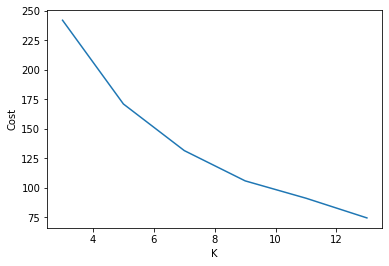

In [75]:
plt.plot(np.arange(3,15,2),np.array(cost))

plt.xlabel("K")
plt.ylabel("Cost")

In [93]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)
print(k,kmeans.inertia_, end = '\r')

In [94]:
pred = kmeans.predict(scaled_data)

In [82]:
len(pred)

60

In [54]:
# #filter rows of original data
# filtered_label0 = df[label == 0]
 
# #plotting the results
# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
# plt.show()

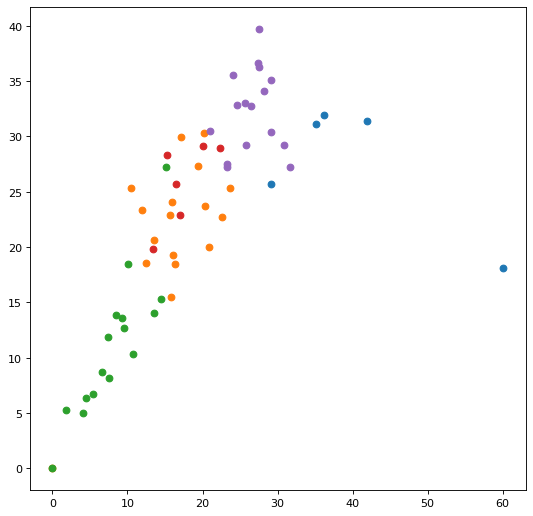

In [95]:
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=80)
for i in range(k):
    idxs = np.where(pred==i)[0]
    z = scaler.inverse_transform(scaled_data[idxs])
    plt.scatter(z[:,0],z[:,1])
#     plt.scatter(len(z), len(z))

plt.show()

In [96]:
from collections import defaultdict
node_type_clusters = defaultdict(list)
geo_clusters = defaultdict(list)

for idx in range(len(final_df)):
    node_type_clusters[pred[idx]].append(final_df.iloc[idx][1])
    geo_clusters[pred[idx]].append([final_df.iloc[idx][2], final_df.iloc[idx][3]])

In [97]:
node_type_clusters = dict(node_type_clusters)
node_type_clusters

{4: ['bank',
  'cafe',
  'dentist',
  'doctor',
  'post_office',
  'gas_station',
  'embassy',
  'city_hall',
  'courthouse',
  'airport',
  'electrician',
  'physiotherapist',
  'cemetery',
  'university',
  'funeral_home',
  'real_estate_agency'],
 3: ['car_repair',
  'furniture_store',
  'car_dealer',
  'art_gallery',
  'hospital',
  'insurance_agency'],
 2: ['restaurant',
  'liquor_store',
  'park',
  'bakery',
  'travel_agency',
  'spa',
  'amusement_park',
  'night_club',
  'movie_theater',
  'meal_delivery',
  'bowling_alley',
  'tourist_attraction',
  'campground',
  'mosque',
  'stadium',
  'synagogue'],
 0: ['supermarket',
  'transit_station',
  'convenience_store',
  'casino',
  'bus_station'],
 1: ['florist',
  'bicycle_store',
  'museum',
  'hardware_store',
  'department_store',
  'shopping_mall',
  'veterinary_care',
  'drugstore',
  'car_wash',
  'laundry',
  'pet_store',
  'train_station',
  'library',
  'church',
  'locksmith',
  'lodging',
  'aquarium']}

In [98]:
file = open("node_type_clusters.txt", "w")
file.write(str(node_type_clusters))
file.close()

In [99]:
node_type_clusters_df = pd.DataFrame.from_dict(node_type_clusters, orient='index')

In [100]:
node_type_clusters_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4,bank,cafe,dentist,doctor,post_office,gas_station,embassy,city_hall,courthouse,airport,electrician,physiotherapist,cemetery,university,funeral_home,real_estate_agency,None
3,car_repair,furniture_store,car_dealer,art_gallery,hospital,insurance_agency,None,None,None,None,None,None,None,None,None,None,None
2,restaurant,liquor_store,park,bakery,travel_agency,spa,amusement_park,night_club,movie_theater,meal_delivery,bowling_alley,tourist_attraction,campground,mosque,stadium,synagogue,None
0,supermarket,transit_station,convenience_store,casino,bus_station,None,None,None,None,None,None,None,None,None,None,None,None
1,florist,bicycle_store,museum,hardware_store,department_store,shopping_mall,veterinary_care,drugstore,car_wash,laundry,pet_store,train_station,library,church,locksmith,lodging,aquarium


In [101]:
# node_type_clusters_df.insert(0, 'Clusters', node_type_clusters_df.index)
# node_type_clusters_df.sort_values(by='Clusters', inplace=True)
node_type_clusters_df = node_type_clusters_df.T
cols = sorted(node_type_clusters_df.columns)
node_type_clusters_df = node_type_clusters_df[cols]
node_type_clusters_df.columns = ['Cluster ' + str(col) for col in node_type_clusters_df.columns]
node_type_clusters_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,supermarket,florist,restaurant,car_repair,bank
1,transit_station,bicycle_store,liquor_store,furniture_store,cafe
2,convenience_store,museum,park,car_dealer,dentist
3,casino,hardware_store,bakery,art_gallery,doctor
4,bus_station,department_store,travel_agency,hospital,post_office
5,None,shopping_mall,spa,insurance_agency,gas_station
6,None,veterinary_care,amusement_park,None,embassy
7,None,drugstore,night_club,None,city_hall
8,None,car_wash,movie_theater,None,courthouse
9,None,laundry,meal_delivery,None,airport


In [62]:
node_type_clusters_df.to_csv('node_type_clusters.csv', index=False)

In [63]:
geo_clusters

defaultdict(list,
            {2: [['47.4554815', '19.040086499999997'],
              ['47.4917714', '19.053533899999998'],
              ['47.5351785', '19.0662467'],
              ['47.5216611', '19.1056188'],
              ['47.5019982', '19.0581406'],
              ['47.4952466', '19.054476'],
              ['47.5088747', '19.053046300000002'],
              ['47.4474749', '19.2144821'],
              ['47.473814399999995', '19.270085'],
              ['47.5047419', '19.068213399999998'],
              ['47.405392', '19.053094899999998'],
              ['47.5443586', '19.0359498']],
             3: [['47.3995473', '19.0506207'],
              ['47.586059000000006', '19.0461879'],
              ['47.4701191', '19.0197873'],
              ['47.49220820000001', '19.2494844'],
              ['47.56081270000001', '19.1180413'],
              ['47.5400079', '19.1365369'],
              ['47.4925268', '19.0646667'],
              ['47.514745', '19.103972'],
              ['47.5091716', '

In [64]:
geo_clusters = dict(geo_clusters)
geo_clusters_1 = geo_clusters[0]

In [65]:
df_geo_1 = pd.DataFrame(geo_clusters_1, columns=['Latitude', 'Longitude'])
df_geo_1

,Latitude,Longitude
0,47.519380700000006,19.0523938
1,47.5710274,19.0621991
2,47.609389,19.113506
3,47.4837524,19.060520899999997
4,47.528998,19.0052178
5,47.526627000000005,19.229402
6,47.4771838,19.0537391
7,47.479809499999995,19.057609699999997


In [66]:
df_geo_1.to_csv('lat_long.csv', index=False)